In [1]:
import numpy as np 
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# given a timeseries and a month, plot all instances of that month
def plot_stack_months(ts, month):
    # sloppy, but we can just store the length of months for now:
    month_length = {1: 31, 2: 28, 3: 31, 4: 30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    # gets just the data within month from ts
    month_data = ts[ts['time.month'] == month]
    #
    # --- Start to plot code:
    #
    fig, ax = plt.subplots(figsize=(10,5))
    years = set(month_data['time.year'].values)
    n = len(years)
    colors = mpl.cm.YlOrRd(np.linspace(0,1,n))
    ndays = len(month_data[years[0]]) # this might break if first february is leap year (??)
    for i, year in enumerate(years):
        ax.plot(np.arange(ndays), month_data[month_data['time'].dt.year == year], color=colors[i], label=year)
    ax.set_xlabel("Day of Month")
    ax.set_ylabel("T$_{\mathrm{max}}$ [degC]")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.legend(ncol=4, bbox_to_anchor=(0, 0.5, 1, 1), loc=5, borderaxespad=0.2)
    return fig, ax

In [4]:
%%time
ds = xr.open_mfdataset("/project/amp/jcaron/CPC_Tminmax/tmax.*.nc")
tmax = ds['tmax']

OSError: no files to open

In [33]:
time = ds['time'].load()

In [3]:
sacramento = (38. + 33/60,  360. - (121. + 28/60))

In [4]:
sac_tmax = tmax.sel(lat=sacramento[0], lon=sacramento[1], method='nearest')

In [8]:
sac_tmax.load()  # Go ahead and do this now to get the time series in memory; makes everything else much faster.

<xarray.DataArray 'tmax' (time: 14736)>
array([ 1.996053,  3.555091,  4.678971, ..., 26.843405, 23.160242, 20.340034],
      dtype=float32)
Coordinates:
    lat      float32 38.75
    lon      float32 238.75
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-05-06
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    units:         degC
    var_desc:      Maximum Temperature

CPU times: user 24.2 ms, sys: 1.83 ms, total: 26 ms
Wall time: 23.2 ms


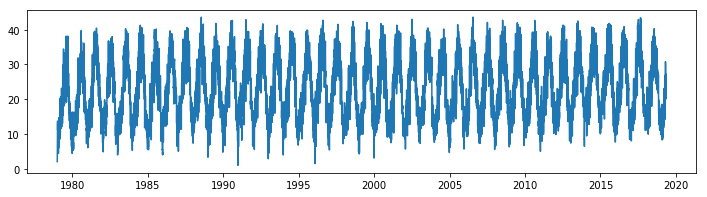

In [11]:
%%time
# PLOT THE FULL TIME SERIES AT THIS LOCATION 
# Notes: 
# - with a large data set, this can actually be a bit slow if the 'load' command hasn't been called (measure with the %%time magic command)
fig001, ax001 = plt.subplots(figsize=(12,3))
ax001.plot(sac_tmax['time'], sac_tmax) # OPTION 1: allow packages to deal with time

In [16]:
# DE-SEASONALIZE the time series by substracting the daily climatology
sac_tmax_dclimo = sac_tmax.groupby('time.dayofyear').mean(dim='time')
sac_tmax_deseason = sac_tmax.groupby('time.dayofyear') - sac_tmax_dclimo

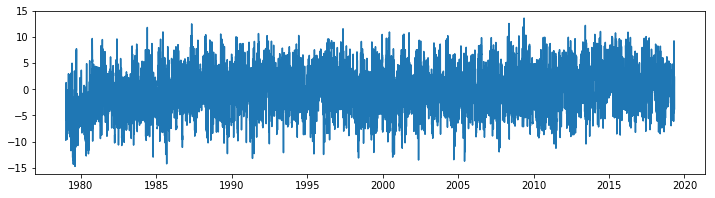

In [18]:
fig002, ax002 = plt.subplots(figsize=(12,3))
ax002.plot(sac_tmax_deseason['time'], sac_tmax_deseason) # OPTION 1: allow packages to deal with time

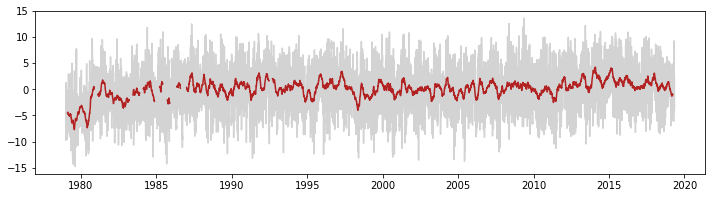

In [32]:
# Because we have so many days, this plot is a bit messy, so we can apply a smoother to it,
# a simple example is a rolling average
# * put the original data on first in gray, then add the smooth data

fig003, ax003 = plt.subplots(figsize=(12,3))
ax003.plot(sac_tmax_deseason['time'], sac_tmax_deseason, color='lightgray') # OPTION 1: allow packages to deal with time
smoothed_data = sac_tmax_deseason.rolling(time=90, center=True).mean()
ax003.plot(sac_tmax_deseason['time'], smoothed_data, color='firebrick')

# I experimented with the smoothing time, only at ~90 days did the red line seem "smooth enough"

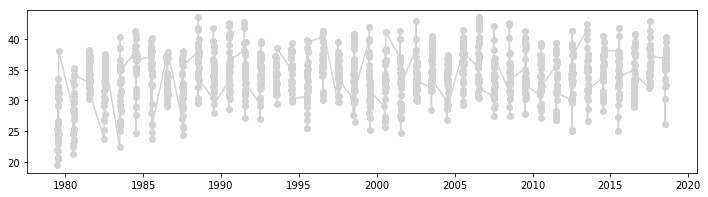

In [67]:
# If we wanted to focus on just, say, july
# we could do that

sac_tmax_july = sac_tmax[time.dt.month == 7]
sac_tmax_july[sac_tmax_july['time'].dt.year == 1981]  # <<-- NOTE this is kind of complicated way to do it, but this gets each day of july 1981
fig004, ax004 = plt.subplots(figsize=(12,3))
ax004.plot(sac_tmax_july['time'], sac_tmax_july, color='lightgray', marker='o') # OPTION 1: allow packages to deal with time 
# problem with this is that there are too many years to make out any detail.

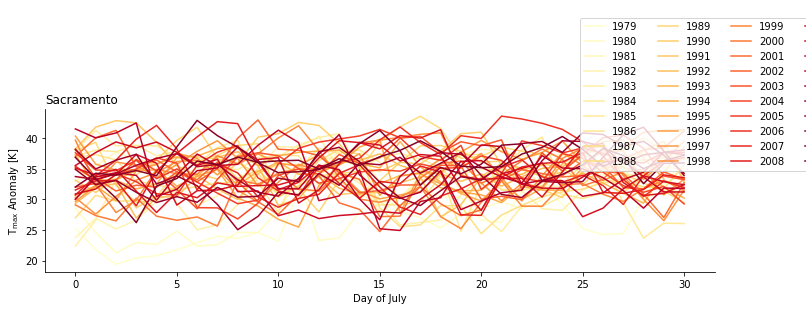

In [116]:
fig005, ax005 = plt.subplots(figsize=(12,3))
years = set(sac_tmax_july['time.year'].values)
n = len(years)
colors = mpl.cm.YlOrRd(np.linspace(0,1,n))

for i, year in enumerate(years):
    ax005.plot(np.arange(31), sac_tmax_july[sac_tmax_july['time'].dt.year == year], color=colors[i], label=year)
    

# ax005.plot(np.arange(31), sac_tmax_july.groupby('time.year').mean(dim='time'), color='red')    
ax005.set_xlabel("Day of July")
ax005.set_ylabel("T$_{\mathrm{max}}$ Anomaly [K]")
ax005.set_title("Sacramento", loc='left')
ax005.spines['top'].set_visible(False)
ax005.spines['right'].set_visible(False)
fig005.legend(ncol=4, bbox_to_anchor=(0, 0.5, 1, 1), loc=5, borderaxespad=0.2)

In [136]:
sac_tmax_july.groupby("time.dayofyear").mean(dim='time')


{182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213}

# Selecting a particular date
The following is one example of how to select a particular date. 

When we load the dataset, Xarray decodes the time coordinate into an array of datetime objects. The nice thing about them is that they can be accessed in ways that allow the specification of parts of the date.

In the following cell, we will use the `dt` accessor to get the indices that are in july (month value equal 7) and with a day (i.e. day of month) equal to 4. 

Note that `time.dt.month ==7` returns an array of True/False values that is True for all data identified as being in July. Then we use the `&` to combine that array with the True/False array that checks for the day of the month being 4. 

In [7]:
time = ds['time']
independence_day = sac_tmax[(time.dt.month == 7) & (time.dt.day == 4)]

In [8]:
time.dt.day[0:366]

<xarray.DataArray 'day' (time: 366)>
array([ 1,  2,  3, ..., 30, 31,  1])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1980-01-01

# Quick look plots

Xarray has some simple plotting functionality. We can use that here to get a quck look at the resulting series of 4 July Tmax values in Sacramento.

_NOTE:_ We really should not rely on Xarray's plots for very much because it becomes hard to customize them.

In [9]:
%matplotlib inline

/project/amp/brianpm/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


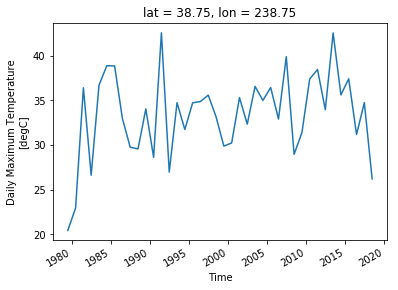

In [10]:
independence_day.plot()

In [21]:
np.histogram(independence_day)

(array([ 1,  1,  3,  2,  6,  5, 10,  6,  4,  2]),
 array([20.43872 , 22.648785, 24.858849, 27.068914, 29.278978, 31.489042,
        33.69911 , 35.909172, 38.119236, 40.3293  , 42.539364],
       dtype=float32))

In [14]:
independence_day.min().values

array(20.43872, dtype=float32)

In [15]:
independence_day.load()

<xarray.DataArray 'tmax' (time: 40)>
array([20.43872 , 22.9501  , 36.398506, 26.625046, 36.67902 , 38.858513,
       38.83661 , 32.96402 , 29.751451, 29.560041, 34.03031 , 28.619316,
       42.539364, 26.962753, 34.7282  , 31.726683, 34.71311 , 34.862328,
       35.575138, 33.15336 , 29.874626, 30.226507, 35.298985, 32.336784,
       36.55246 , 34.984577, 36.420593, 32.90054 , 39.877167, 28.960207,
       31.367868, 37.378284, 38.440315, 33.94316 , 42.525158, 35.599594,
       37.400303, 31.17207 , 34.73664 , 26.212353], dtype=float32)
Coordinates:
    lat      float32 38.75
    lon      float32 238.75
  * time     (time) datetime64[ns] 1979-07-04 1980-07-04 ... 2018-07-04
Attributes:
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    cell_methods:  time: mean
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded 

(array([ 1.,  1.,  3.,  2.,  6.,  5., 10.,  6.,  4.,  2.]),
 array([20.43872 , 22.648785, 24.858849, 27.068914, 29.278978, 31.489042,
        33.69911 , 35.909172, 38.119236, 40.3293  , 42.539364],
       dtype=float32),
 <a list of 10 Patch objects>)

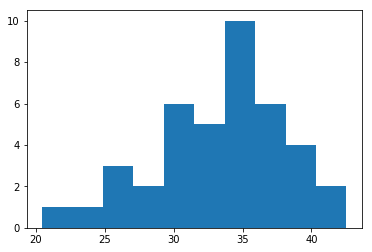

In [18]:
plt.hist(independence_day, bins=10)

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 2., 0., 0., 1., 1., 2.,
        2., 0., 2., 1., 1., 2., 1., 2., 3., 3., 2., 2., 2., 2., 0., 1., 2.,
        0., 1., 0., 0., 0., 2.]),
 array([20.43872 , 20.991238, 21.543753, 22.09627 , 22.648785, 23.201302,
        23.753817, 24.306334, 24.858849, 25.411366, 25.963882, 26.516397,
        27.068914, 27.62143 , 28.173946, 28.726461, 29.278978, 29.831493,
        30.38401 , 30.936525, 31.489042, 32.041557, 32.594074, 33.14659 ,
        33.69911 , 34.25162 , 34.80414 , 35.356655, 35.909172, 36.461685,
        37.014202, 37.56672 , 38.119236, 38.671753, 39.224266, 39.776783,
        40.3293  , 40.881817, 41.43433 , 41.986847, 42.539364],
       dtype=float32),
 <a list of 40 Patch objects>)

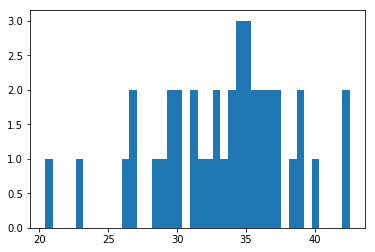

In [19]:
plt.hist(independence_day, bins=40)

# Simple function
Just as a reminder, you can make reusable code by defining a function. Here is a function that is called `degC_to_degF` that takes temperature in Celsius and converts it to Fahrenheit. 

Then we use that function to really drive home the point that Sacramento is super hot.

In [30]:
def degC_to_degF(C):
    return C * (9./5.) + 32.

In [31]:

in_f = degC_to_degF(independence_day)

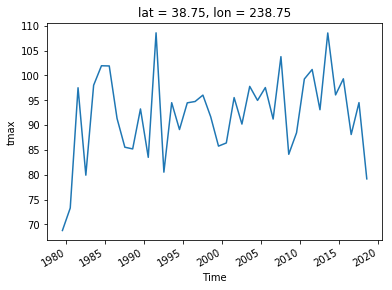

In [32]:
in_f.plot()

In [155]:
def plot_hist_month(ts, month):
    month_data = ts[ts['time.month'] == month]
    h, edges = np.histogram(month_data, bins=np.arange(-10.5, 120.5, 0.5), density=True)
    bin_centers = edges[:-1:] + 0.5*np.diff(edges)  # take all but the last edge and add the half-width of the bin
    # to transform from "density" to hprime so that the sum of hprime = 1
    hprime = h / h.sum()  # has units of "fraction of data set" and sums to 1.0
    fig, ax = plt.subplots(constrained_layout=True)
    ax.bar(bin_centers, hprime)
    ax.set_ylabel("fraction")
    return fig, ax

5220.0
1.0


In [153]:
# proving that the centers are correct
# fake_x = np.linspace(0, 1, 11)
# fake_y = np.random.random_sample(1000)
# fake_h, fake_edges = np.histogram(fake_x)
# print(fake_x)
# print(fake_edges)
# bin_centers = fake_edges[:-1] + 0.5*np.diff(fake_edges)
# print(bin_centers)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [117]:
#np.histogram?
ax007.set_ylim(0, .5)

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to t

In [7]:
y = set([1979, 1980, 1981])
min(y)

1979